In [74]:
import os
import json
import time
import pandas as pd
from src.gender import gender
from src.vycisti import vycisti
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())
with open(os.path.join("data_fixes", "zeny.json"), encoding="utf-8") as zeny:
    zeny = json.loads(zeny.read())
with open(os.path.join("data_fixes", "nelide.json"), encoding="utf-8") as nelide:
    nelide = json.loads(nelide.read())
df = vycisti(df, opravy)

2023/05/25 14:46:07 z 4532 filmů odstraněno 125. Aktuální dataframe obsahuje 4407 filmů.


In [75]:
profese = seznamy["profese"]
persony = pd.read_json(os.path.join("data", "persony.json"))
jmena_lidi = persony[persony["Osoba"] == "fyzická"]["Jméno"].to_list()

In [76]:
def plose_jednoduse(x):
    seznam = []
    for y in x:
        if y == None:
            pass
        if isinstance(y, str):
            if y not in seznam:
                seznam.append(y)
        if isinstance(y, list):
            for z in y:
                if z not in seznam:
                    seznam.append(z)
    return(seznam)

In [82]:
def kolik_skoncilo(lidodf, jmena_lidi):
    st = time.time()
    lidodf["Lidé"] = lidodf[profese].values.tolist()
    lidodf["Lidé"] = lidodf["Lidé"].apply(lambda x: plose_jednoduse(x))
    lidodf = lidodf[["Copyright","Lidé","Film"]].explode("Lidé")
    lidodf = lidodf[lidodf["Lidé"].isin(jmena_lidi)]
    lidodf = lidodf.groupby("Copyright")["Lidé"].apply(lambda x: list(set(x)))
    lidodf = pd.DataFrame(lidodf).explode("Lidé")
    lidodf["Rok"] = lidodf.index
    print(f"{len(lidodf)} člověkoletopočtů")
    lidodf["Příští film"] = lidodf[["Lidé","Rok"]].apply(lambda x: lidodf[(lidodf["Lidé"] == x["Lidé"]) & (lidodf["Rok"] > x["Rok"])]["Rok"].min(), axis = 1)
    print(f"čas výpočtu: {time.time() - st} s")
    return(lidodf)

In [78]:
kolik_skoncilo(df.head(500), jmena_lidi)

C:\Users\micha\AppData\Local\Temp\ipykernel_28228\790359921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lidodf["Lidé"] = lidodf[profese].values.tolist()
C:\Users\micha\AppData\Local\Temp\ipykernel_28228\790359921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lidodf["Lidé"] = lidodf["Lidé"].apply(lambda x: plose_jednoduse(x))


2708 člověkoletopočtů
Čas výpočtu: 2.0810465812683105 s


,Lidé,Rok,Příští film
Copyright,,,
1898,Marie Kříženecká (99776),1898,NaN
1898,Ferdinand Gýra (60351),1898,NaN
1898,Jan Kříženecký (127419),1898,1901.0
1898,Josef Šváb-Malostranský (55291),1898,1913.0
1901,Jan Kříženecký (127419),1901,1902.0
...,...,...,...
1931,Jaroslav Gradwohl (127665),1931,NaN
1931,Fernand René (128434),1931,NaN
1931,Gustav Machatý (33488),1931,NaN


In [79]:
kolik_skoncilo(df.head(1000), jmena_lidi)

C:\Users\micha\AppData\Local\Temp\ipykernel_28228\790359921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lidodf["Lidé"] = lidodf[profese].values.tolist()
C:\Users\micha\AppData\Local\Temp\ipykernel_28228\790359921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lidodf["Lidé"] = lidodf["Lidé"].apply(lambda x: plose_jednoduse(x))


7187 člověkoletopočtů
Čas výpočtu: 7.631985187530518 s


,Lidé,Rok,Příští film
Copyright,,,
1898,Marie Kříženecká (99776),1898,NaN
1898,Ferdinand Gýra (60351),1898,NaN
1898,Jan Kříženecký (127419),1898,1901.0
1898,Josef Šváb-Malostranský (55291),1898,1913.0
1901,Jan Kříženecký (127419),1901,1902.0
...,...,...,...
1940,Jiří Slavíček (31972),1940,NaN
1940,František H. Otto (127479),1940,NaN
1940,Václav Švec (126974),1940,NaN


In [80]:
konce = kolik_skoncilo(df, jmena_lidi)

102301 člověkoletopočtů
Čas výpočtu: 1482.15593957901 s


In [81]:
konce

,Lidé,Rok,Příští film
Copyright,,,
1898,Marie Kříženecká (99776),1898,NaN
1898,Ferdinand Gýra (60351),1898,NaN
1898,Jan Kříženecký (127419),1898,1901.0
1898,Josef Šváb-Malostranský (55291),1898,1913.0
1901,Jan Kříženecký (127419),1901,1902.0
...,...,...,...
2022,Petr Houdek (8112),2022,NaN
2022,Igor Chmela (26627),2022,NaN
2022,Helena Matušková (80866),2022,NaN


In [83]:
konce["Pauza"] = konce["Příští film"] - konce["Rok"]

In [84]:
konce.to_json(os.path.join("data", "pauzy.json"), orient="records")

In [85]:
konce

,Lidé,Rok,Příští film,Pauza
Copyright,,,,
1898,Marie Kříženecká (99776),1898,NaN,NaN
1898,Ferdinand Gýra (60351),1898,NaN,NaN
1898,Jan Kříženecký (127419),1898,1901.0,3.0
1898,Josef Šváb-Malostranský (55291),1898,1913.0,15.0
1901,Jan Kříženecký (127419),1901,1902.0,1.0
...,...,...,...,...
2022,Petr Houdek (8112),2022,NaN,NaN
2022,Igor Chmela (26627),2022,NaN,NaN
2022,Helena Matušková (80866),2022,NaN,NaN


<AxesSubplot:xlabel='Rok'>

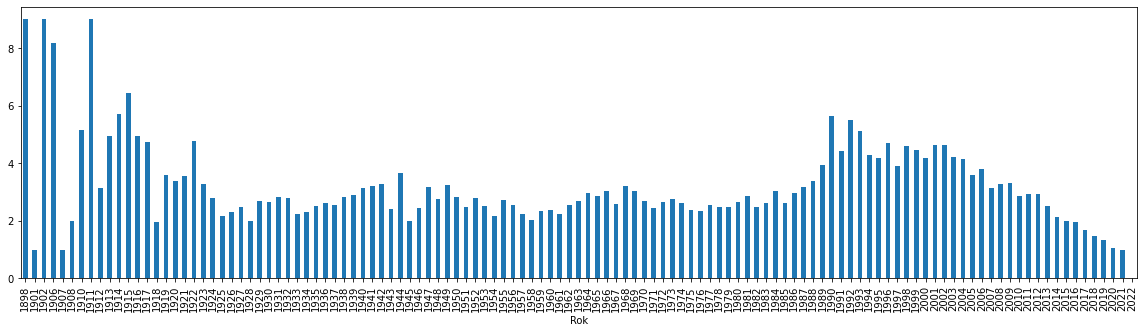

In [88]:
konce.groupby("Rok")["Pauza"].mean().plot.bar(figsize=(20,5))

In [160]:
r3 = konce.groupby("Lidé")["Rok"].nunique()
r3 = r3[r3 >= 5]
r3 = r3.index.to_list()

In [161]:
k3 = konce[konce["Lidé"].isin(r3)]

In [162]:
k3 = k3[k3["Rok"].isin(range(1920,2011))]

In [163]:
k3 = k3.merge(persony[["Jméno","Rok úmrtí"]], left_on="Lidé", right_on="Jméno")

In [164]:
k3["Příští film"] = pd.to_numeric(k3["Příští film"], errors="coerce")

In [165]:
k3["Rok úmrtí"] = pd.to_numeric(k3["Rok úmrtí"], errors="coerce")

In [166]:
k3.loc[k3["Příští film"] > k3["Rok úmrtí"],"Příští film"]=None

In [167]:
k3.groupby("Rok")["Lidé"].nunique()

Rok
1920    114
1921    138
1922    131
1923     81
1924     78
       ... 
2006    677
2007    573
2008    759
2009    875
2010    757
Name: Lidé, Length: 91, dtype: int64

In [168]:
k3.sample(5)

,Lidé,Rok,Příští film,Pauza,Jméno,Rok úmrtí
6421,Jaroslav Mottl (55549),1943,1944.0,1.0,Jaroslav Mottl (55549),1986.0
29649,Zdena Hajdová (129514),1964,1982.0,18.0,Zdena Hajdová (129514),1991.0
54307,Tomáš Vacek (126681),1976,1977.0,1.0,Tomáš Vacek (126681),NaN
55836,Jitka Asterová (6081),1989,1990.0,1.0,Jitka Asterová (6081),NaN
7701,Jiří Trnka (28391),1959,1960.0,1.0,Jiří Trnka (28391),1969.0


<AxesSubplot:xlabel='Rok'>

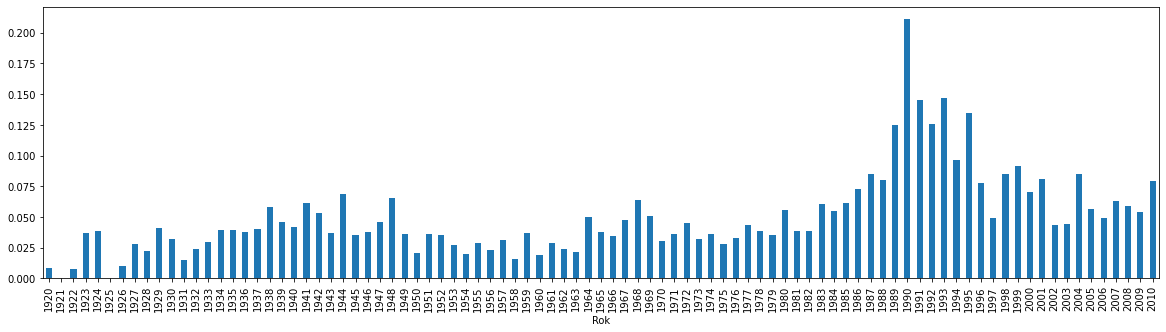

In [169]:
pd.Series(k3[k3["Pauza"].isnull()].groupby("Rok")["Lidé"].nunique() / k3.groupby("Rok")["Lidé"].nunique()).plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Rok'>

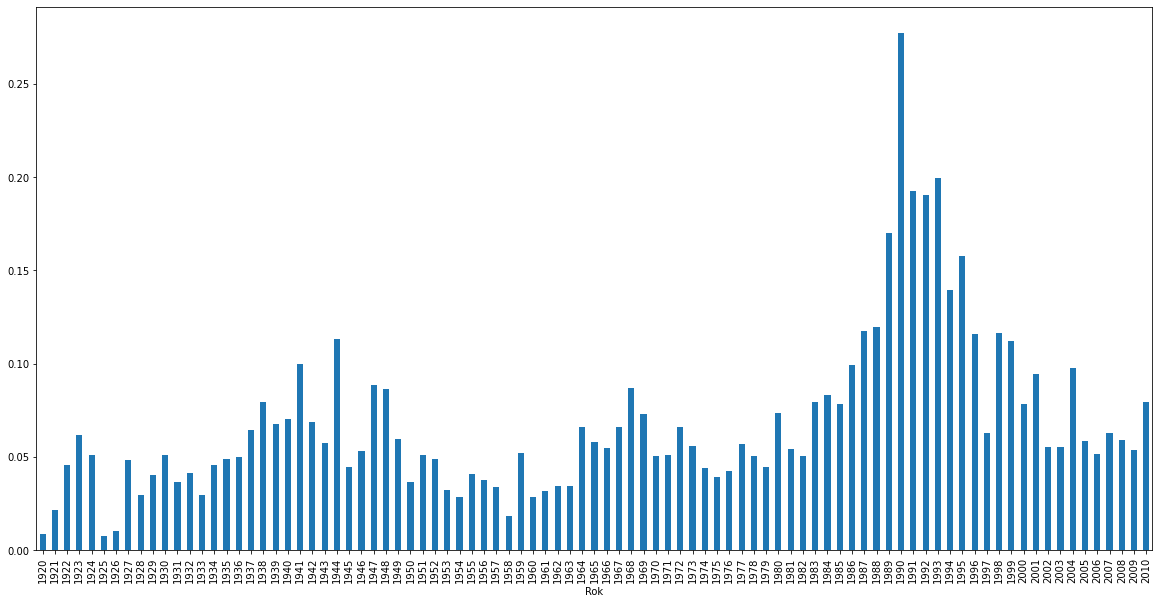

In [170]:
pd.Series(k3[(k3["Pauza"] >= 15) | (k3["Pauza"].isnull())].groupby("Rok")["Lidé"].nunique() / k3.groupby("Rok")["Lidé"].nunique()).plot.bar(figsize=(20,10))